# 뉴스 기사 분류
* 딥러닝을 활용해 뉴스 기사를 총 46개의 서로 다른 주제로 분류
* 로이터 데이터셋 : 1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합
* 하나의 기사당 하나의 토픽으로만 연결

## 전처리

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
# 데이터, label 모양
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [ ]:
# data 타입
print(type(train_data[0]))
print(train_data[0])

<class 'list'>
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
# label 타입
print(type(train_labels[0]))
print(train_labels[0])

<class 'numpy.int64'>
3


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

# 0, 1, 2 는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # (행, 10000)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 모델 생성
* 은닉층 구성

In [ ]:
from keras import models
from keras import layers

model = models.Sequential() # 모델 생성
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # 인풋 레이어 구성 - 입력의 열 개수는 10000
model.add(layers.Dense(64, activation='relu')) # 은닉층 구성 - 은닉층은 적당한 개수로 구성
model.add(layers.Dense(46, activation='softmax')) # 출력층 구성 46진 분류

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


옵티마이저, loss function, 성능지표

In [ ]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train 데이터에서 val, train으로 재분류
x_val = x_train[:1000] 
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 157us/step - loss: 2.6559 - accuracy: 0.5368 - val_loss: 1.7127 - val_accuracy: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.3833 - accuracy: 0.7126 - val_loss: 1.3093 - val_accuracy: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.0369 - accuracy: 0.7734 - val_loss: 1.1393 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.8253 - accuracy: 0.8191 - val_loss: 1.0882 - val_accuracy: 0.7550
Epoch 5/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.6572 - accuracy: 0.8602 - val_loss: 0.9862 - val_accuracy: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.5248 - accuracy: 0.8877 - val_loss: 0.9378 - val_accuracy: 0.8170
Epoch 7/20
7982/7982 [==============================] - 1s 149us/step - loss

## Loss 시각화

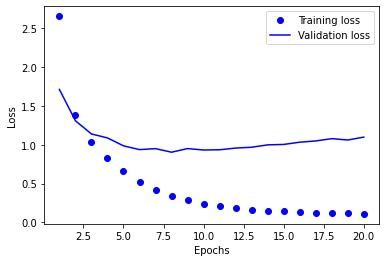

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

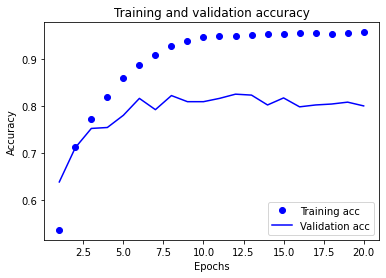

In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 재학습

In [ ]:
from keras import models
from keras import layers

model = models.Sequential() # 모델 생성
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # 인풋 레이어 구성 - 입력의 열 개수는 10000
model.add(layers.Dense(64, activation='relu')) # 은닉층 구성 - 은닉층은 적당한 개수로 구성
model.add(layers.Dense(46, activation='softmax')) # 출력층 구성 46진 분류

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 135us/step - loss: 2.7189 - accuracy: 0.5045 - val_loss: 1.7591 - val_accuracy: 0.6380
Epoch 2/9
7982/7982 [==============================] - 1s 119us/step - loss: 1.4108 - accuracy: 0.7164 - val_loss: 1.3079 - val_accuracy: 0.7190
Epoch 3/9
7982/7982 [==============================] - 1s 119us/step - loss: 1.0381 - accuracy: 0.7823 - val_loss: 1.1419 - val_accuracy: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.8168 - accuracy: 0.8270 - val_loss: 1.0323 - val_accuracy: 0.7800
Epoch 5/9
7982/7982 [==============================] - 1s 143us/step - loss: 0.6494 - accuracy: 0.8656 - val_loss: 0.9728 - val_accuracy: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.5175 - accuracy: 0.8950 - val_loss: 0.9252 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.416

## 결과
* acc = 0.78

In [ ]:
results

[0.9695695196000572, 0.7943009734153748]

In [ ]:
predictions = model.predict(x_test)
predictions

array([[2.64861501e-05, 6.18297432e-04, 1.63916760e-04, ...,
        2.31750571e-04, 5.32787681e-06, 3.51533563e-05],
       [3.36928247e-03, 3.94763201e-02, 1.09903915e-02, ...,
        1.17512891e-05, 3.34578945e-04, 1.41045282e-04],
       [2.25750506e-02, 8.22666049e-01, 5.61609305e-03, ...,
        1.77609283e-04, 1.26022112e-03, 2.97402701e-04],
       ...,
       [8.81419510e-06, 8.88714800e-04, 1.13779570e-04, ...,
        8.03833464e-05, 8.56163206e-06, 2.39982746e-05],
       [1.40046468e-03, 6.22553267e-02, 2.86253192e-03, ...,
        2.67400779e-03, 2.39173358e-04, 2.91198213e-03],
       [6.70373382e-04, 6.66986883e-01, 8.56109243e-03, ...,
        6.09348026e-05, 3.00493353e-04, 6.29829810e-05]], dtype=float32)

확률 분포의 합이므로 1

In [ ]:
sum(predictions[0])

1.000000015521323

# 은닉층 개수에 따른 결과 변화

## 은닉층의 unit 수를 줄이는 경우

In [ ]:
from keras import models
from keras import layers

model = models.Sequential() # 모델 생성
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # 인풋 레이어 구성 - 입력의 열 개수는 10000
model.add(layers.Dense(4, activation='relu')) # 은닉층 구성 - 은닉층은 적당한 개수로 구성
model.add(layers.Dense(46, activation='softmax')) # 출력층 구성 46진 분류

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 190us/step - loss: 3.2387 - accuracy: 0.2345 - val_loss: 2.8154 - val_accuracy: 0.2470
Epoch 2/20
7982/7982 [==============================] - 2s 200us/step - loss: 2.5377 - accuracy: 0.2580 - val_loss: 2.3302 - val_accuracy: 0.2850
Epoch 3/20
7982/7982 [==============================] - 2s 207us/step - loss: 1.9341 - accuracy: 0.3338 - val_loss: 1.7569 - val_accuracy: 0.3570
Epoch 4/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.3731 - accuracy: 0.6637 - val_loss: 1.4585 - val_accuracy: 0.6800
Epoch 5/20
7982/7982 [==============================] - 2s 207us/step - loss: 1.1176 - accuracy: 0.7250 - val_loss: 1.4100 - val_accuracy: 0.6780
Epoch 6/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.9907 - accuracy: 0.7481 - val_loss: 1.3384 - val_accuracy: 0.7050
Epoch 7/20
7982/7982 [==============================] - 2s 195us/step - loss

* 검증 셋의 Accuracy가 감소
* 은닉층의 개수와 각 은닉층의 unit 수는 분류를 위한 정보의 양
* 정보를 너무 낮은 차원으로 압축시키면 분류가 어려워짐

In [ ]:
from keras import models
from keras import layers

model = models.Sequential() # 모델 생성
model.add(layers.Dense(128, activation='relu', input_shape=(10000,))) # 인풋 레이어 구성 - 입력의 열 개수는 10000
model.add(layers.Dense(64, activation='relu')) # 은닉층 구성 - 은닉층은 적당한 개수로 구성
model.add(layers.Dense(46, activation='softmax')) # 출력층 구성 46진 분류

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 316us/step - loss: 1.6012 - accuracy: 0.6719 - val_loss: 1.1162 - val_accuracy: 0.7570
Epoch 2/20
7982/7982 [==============================] - 2s 287us/step - loss: 0.7897 - accuracy: 0.8274 - val_loss: 0.9340 - val_accuracy: 0.7960
Epoch 3/20
7982/7982 [==============================] - 2s 260us/step - loss: 0.4867 - accuracy: 0.8971 - val_loss: 0.8510 - val_accuracy: 0.8220
Epoch 4/20
7982/7982 [==============================] - 2s 249us/step - loss: 0.3258 - accuracy: 0.9308 - val_loss: 0.8950 - val_accuracy: 0.8170
Epoch 5/20
7982/7982 [==============================] - 2s 270us/step - loss: 0.2504 - accuracy: 0.9416 - val_loss: 0.9239 - val_accuracy: 0.8070
Epoch 6/20
7982/7982 [==============================] - 2s 272us/step - loss: 0.1983 - accuracy: 0.9488 - val_loss: 0.9711 - val_accuracy: 0.7990
Epoch 7/20
7982/7982 [==============================] - 2s 305us/step - loss

# 손실함수
* sparse_categorical_crossecntropy : 정수형 분류
* categorical_crossenctopy : one-hot 인코딩 분류